In [1]:
# Task 1: Import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Task 2: Data frame
data_frame_diamond=pd.read_csv("diamond.csv")
print(data_frame_diamond)


      Unnamed: 0 carat        cut color clarity  average us salary  \
0              1  0.23      Ideal     E     SI2              31282   
1              2  0.21    Premium     E     SI1              40049   
2              3  0.23       Good     E     VS1              33517   
3              4  0.29    Premium     I     VS2              38495   
4              5  0.31       Good     J     SI2              34178   
...          ...   ...        ...   ...     ...                ...   
53935      53936  0.72      Ideal     D     SI1              43892   
53936      53937  0.72       Good     D     SI1              35532   
53937      53938   0.7  Very Good     D     SI1              32133   
53938      53939  0.86    Premium     H     SI2              44248   
53939      53940  0.75      Ideal     D     SI2              41412   

       number of diamonds mined (millions) depth table price     x     y     z  
0                                     5.01  61.5    55   326  3.95  3.98  2.43

In [3]:
# Task 2: Data frame
#By using head attribute we can display the first nth rows 
data_frame_diamond.head(10)


Unnamed: 0  carat        cut color clarity  average us salary  \
0          1   0.23      Ideal     E     SI2              31282   
1          2   0.21    Premium     E     SI1              40049   
2          3   0.23       Good     E     VS1              33517   
3          4   0.29    Premium     I     VS2              38495   
4          5   0.31       Good     J     SI2              34178   
5          6   0.24  Very Good     J    VVS2              44700   
6          7   0.24  Very Good     I    VVS1              42939   
7          8  FALSE        NaN     H     SI1              37587   
8          9   0.22       Fair     E     VS2              30454   
9         10   0.23  Very Good     H     VS1              45506   

   number of diamonds mined (millions)  depth  table price     x     y     z  
0                                 5.01   61.5     55   326  3.95  3.98  2.43  
1                                 1.69   59.8     61   326  3.89  3.84  2.31  
2                                 3.85   56.9     65   327  4.05  4.07  2.31  
3                                 3.49   62.4     58   334   4.2  4.23  2.63  
4                                 4.70   63.3     58   335  4.34  4.35  2.75  
5                                 0.86   62.8     57   336  3.94  3.96  2.48  
6                                 1.68   62.3     57   336  3.95  3.98  2.47  
7                                 4.62  MAYBE  MAYBE   NaN  4.07  4.11  2.53  
8                                 4.02   65.1     61   337  3.87  3.78  2.49  
9                                 1.20   59.4     61   338     4  4.05  2.39

In [4]:
# Task 2: Data frame
#we need to know the data in formation and data types of the data we are working on so we use .info
data_frame_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           53563 non-null  object 
 1   carat                                52430 non-null  object 
 2   cut                                  52647 non-null  object 
 3   color                                52428 non-null  object 
 4   clarity                              53587 non-null  object 
 5   average us salary                    53940 non-null  int64  
 6   number of diamonds mined (millions)  53940 non-null  float64
 7   depth                                53246 non-null  object 
 8   table                                52398 non-null  object 
 9   price                                52357 non-null  object 
 10  x                                    52414 non-null  object 
 11  y                           

In [5]:
#as the column "Unnamed: 0" is just the index of the data and wouldnt be useful in the future process we drop the column 
data_frame_diamond=data_frame_diamond.drop('Unnamed: 0', axis=1)
data_frame_diamond.columns

Index(['carat', 'cut', 'color', 'clarity', 'average us salary',
       'number of diamonds mined (millions)', 'depth', 'table', 'price', 'x',
       'y', 'z'],
      dtype='object')

In [7]:
# Task 2: Data frame
data_frame_diamond.describe()

average us salary  number of diamonds mined (millions)
count       53940.000000                         53940.000000
mean        39521.990100                             2.902669
std          5486.892971                             1.325985
min         30000.000000                             0.600000
25%         34780.000000                             1.750000
50%         39547.500000                             2.910000
75%         44252.000000                             4.050000
max         48999.000000                             5.200000

In [13]:
#prints the number of null values in each column of the data frame 
data_frame_diamond.isnull().sum()

carat                                  1510
cut                                    1293
color                                  1512
clarity                                 353
average us salary                         0
number of diamonds mined (millions)       0
depth                                   694
table                                  1542
price                                  1583
x                                      1526
y                                      1221
z                                      1433
dtype: int64

In [15]:
#there are invald enteries in the data set so we need to remove these invalid entries
invalid_entries = ['TRUE', 'FALSE', 'MAYBE']

#replacing all the invalid entries with null values  
data_frame_diamond = data_frame_diamond.replace(invalid_entries, pd.NA)

#select all the numeric columns from the data frame and replace all the null values in the column with mean value of the respective column  
num_columns = data_frame_diamond.select_dtypes(include=['float64', 'int64']).columns
data_frame_diamond.fillna({col: data_frame_diamond[col].mean() for col in num_columns}, inplace=True)

#select all the non numeric columns from the data frame and replace all the null values in the column with most repeated value of the respective column that is mode of the coloumn 
non_num_columns= data_frame_diamond.select_dtypes(include=['object']).columns
data_frame_diamond.fillna({col: data_frame_diamond[col].mode()[0] for col in non_num_columns}, inplace=True)

data_frame_diamond_1 = data_frame_diamond.copy()

In [17]:
#we check the null value count after replacing all the null values with mean and mode 
data_frame_diamond_1.isnull().sum()

carat                                  0
cut                                    0
color                                  0
clarity                                0
average us salary                      0
number of diamonds mined (millions)    0
depth                                  0
table                                  0
price                                  0
x                                      0
y                                      0
z                                      0
dtype: int64

In [19]:
# Task 4: Handling String formats
#we convert all the non numeric coloums to lower case 
data_frame_diamond_1['cut'] = data_frame_diamond_1['cut'].str.lower()
data_frame_diamond_1['color'] = data_frame_diamond_1['color'].str.lower()
data_frame_diamond_1['clarity'] = data_frame_diamond_1['clarity'].str.lower()

In [21]:
data_frame_diamond_1.head()

carat      cut color clarity  average us salary  \
0  0.23    ideal     e     si2              31282   
1  0.21  premium     e     si1              40049   
2  0.23     good     e     vs1              33517   
3  0.29  premium     i     vs2              38495   
4  0.31     good     j     si2              34178   

   number of diamonds mined (millions) depth table price     x     y     z  
0                                 5.01  61.5    55   326  3.95  3.98  2.43  
1                                 1.69  59.8    61   326  3.89  3.84  2.31  
2                                 3.85  56.9    65   327  4.05  4.07  2.31  
3                                 3.49  62.4    58   334   4.2  4.23  2.63  
4                                 4.70  63.3    58   335  4.34  4.35  2.75

In [23]:
# Task 5: Handling Outliers
#selecting the numeric columns from the data frame 
numerical_columns = data_frame_diamond_1.select_dtypes(include=['float64', 'int64']).columns

#function to replace all the  numeric data with mean values 
def outliers(data_frame_diamond_1, column):
    Q1 = data_frame_diamond_1[column].quantile(0.25)
    Q3 = data_frame_diamond_1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = data_frame_diamond_1[column].mean()
    data_frame_diamond_1[column] = data_frame_diamond_1[column].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)
    return data_frame_diamond_1


for column in numerical_columns:
    data_frame_diamond_1 = outliers(data_frame_diamond_1, column)

data_frame_diamond_1.head()

carat      cut color clarity  average us salary  \
0  0.23    ideal     e     si2              31282   
1  0.21  premium     e     si1              40049   
2  0.23     good     e     vs1              33517   
3  0.29  premium     i     vs2              38495   
4  0.31     good     j     si2              34178   

   number of diamonds mined (millions) depth table price     x     y     z  
0                                 5.01  61.5    55   326  3.95  3.98  2.43  
1                                 1.69  59.8    61   326  3.89  3.84  2.31  
2                                 3.85  56.9    65   327  4.05  4.07  2.31  
3                                 3.49  62.4    58   334   4.2  4.23  2.63  
4                                 4.70  63.3    58   335  4.34  4.35  2.75

In [26]:
#convert "carat","price " columns to numeric
data_frame_diamond_1['carat'] = pd.to_numeric(data_frame_diamond_1['carat'], errors='coerce')
data_frame_diamond_1['price'] = pd.to_numeric(data_frame_diamond_1['price'], errors='coerce')

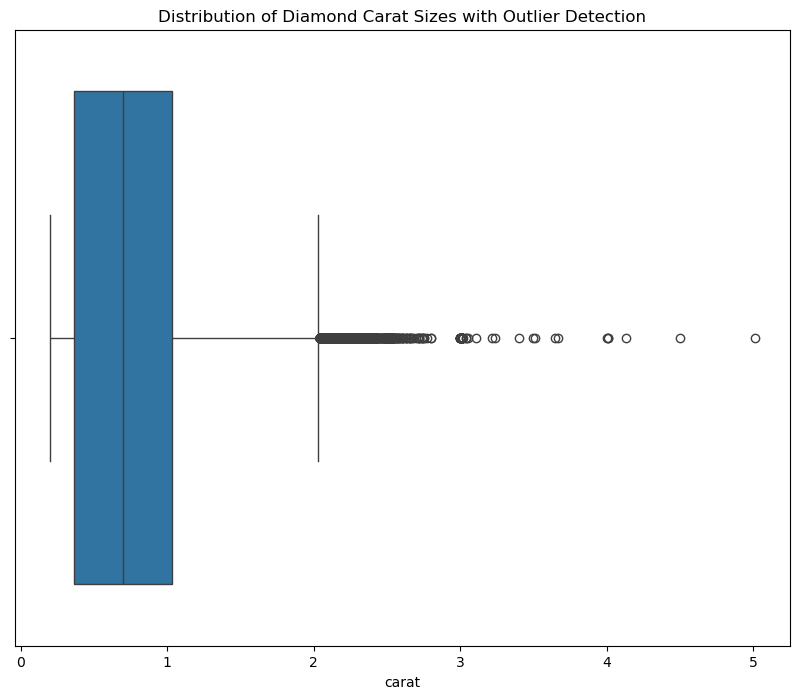

In [28]:
# Task 6: Data visualization
plt.figure(figsize=(10,8))
sns.boxplot(x='carat', data=data_frame_diamond_1)
plt.title('Distribution of Diamond Carat Sizes with Outlier Detection')
plt.show()

Correlation value of each feature with price:
 cut                                    1.000000
table                                  0.180074
price                                  0.047320
y                                      0.038818
x                                      0.038676
clarity                                0.035349
carat                                  0.031366
z                                      0.015287
average us salary                      0.001916
number of diamonds mined (millions)    0.001913
color                                 -0.005366
depth                                 -0.194196
Name: cut, dtype: float64

 low correlation columns:['average us salary', 'number of diamonds mined (millions)', 'color']


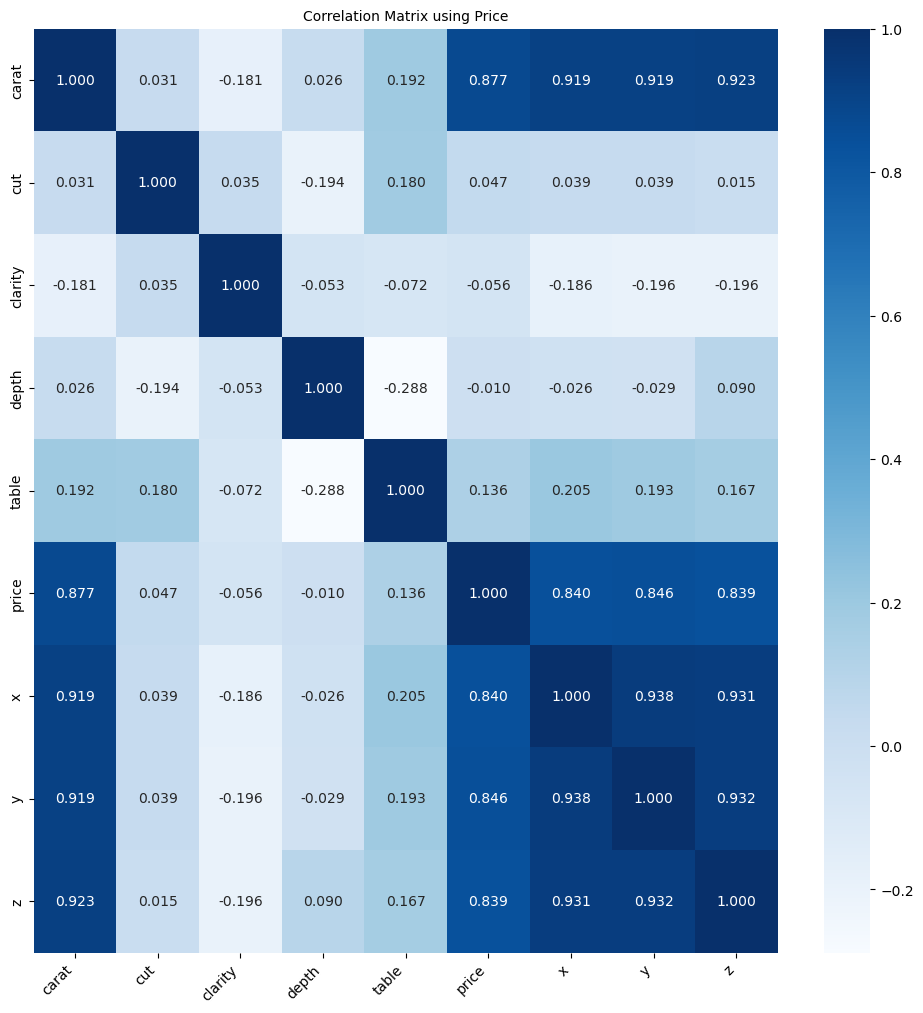

In [29]:
for col in data_frame_diamond_1.select_dtypes(include=['object']).columns:
    data_frame_diamond_1[col] = pd.Categorical(data_frame_diamond_1[col]).codes
matrix = data_frame_diamond_1.corr()
correlation = matrix['cut'].sort_values(ascending=False)
print("Correlation value of each feature with price:\n", correlation)
threshold = 0.01
low = correlation[correlation.abs() < threshold].index
data_frame_diamond_1 = data_frame_diamond_1.drop(columns=low)
print(f"\n low correlation columns:{list(low)}")

plt.figure(figsize=(12, 12))
sns.heatmap(data_frame_diamond_1.corr(), cmap='Blues', annot=True, fmt=".3f")
plt.title("Correlation Matrix using Price", size=10)
plt.xticks(rotation=45, ha='right')
plt.show()


In [31]:
data_frame_diamond_1['cut'] = pd.Categorical(data_frame_diamond_1['cut']).codes
data_frame_diamond_1['clarity'] = pd.Categorical(data_frame_diamond_1['clarity']).codes
data_frame_diamond_1

carat  cut  clarity  depth  table  price    x    y    z
0       0.23    2        3     83     29    326   26   28   24
1       0.21    3        2     66     89    326   20   14   12
2       0.23    1        4     37    113    327   36   38   12
3       0.29    3        5     92     59    334   51   54   44
4       0.31    1        3    101     59    335   65   66   56
...      ...  ...      ...    ...    ...    ...  ...  ...  ...
53935   0.72    2        2     76     49   2757  206  207  131
53936   0.72    1        2     99     29   2757  200  206  142
53937   0.70    4        2     96     79   2757  197  199  137
53938   0.86    3        3     78     59   2757  246  244  155
53939   0.75    2        3     90     29   2757  214  218  145

[53940 rows x 9 columns]

In [32]:
data_frame_diamond_1.to_csv('diamond_preprocessed.csv', index=False)

In [35]:
target='carat'
X = data_frame_diamond_1.drop(columns=[target])  
y = data_frame_diamond_1[target] 


In [38]:

X = data_frame_diamond_1.drop(columns=[target])
y = data_frame_diamond_1[target]

print("X shape:", X.shape) 
print("y shape:", y.shape) 


X shape: (53940, 8)
y shape: (53940,)


In [40]:
train_size = int(0.8 * len(X))  

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (43152, 8)
X_test shape: (10788, 8)
y_train shape: (43152,)
y_test shape: (10788,)


In [42]:

normalize = X_train.select_dtypes(include=['float', 'int']).columns


min_train = X_train[normalize].min()
max_train = X_train[normalize].max()

print('Minimum of each column is:\n', min_train)
print('Maximum of each column is:\n', max_train)

for column in normalize:
    X_train.loc[:, column] = (X_train[column] - min_train[column]) / (max_train[column] - min_train[column])
    X_test.loc[:, column] = (X_test[column] - min_train[column]) / (max_train[column] - min_train[column])



Minimum of each column is:
 price    326
dtype: int64
Maximum of each column is:
 price    18823
dtype: int64


/tmp/ipykernel_25488/2487062000.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.00000000e+00 0.00000000e+00 5.40628210e-05 ... 5.74687787e-02
 5.74687787e-02 5.74687787e-02]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, column] = (X_train[column] - min_train[column]) / (max_train[column] - min_train[column])
/tmp/ipykernel_25488/2487062000.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.05746878 0.05746878 0.01508353 ... 0.13142672 0.13142672 0.13142672]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:, column] = (X_test[column] - min_train[column]) / (max_train[column] - min_train[column])


In [44]:
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]   

weights = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)


In [46]:
y_train_pred = X_train_b.dot(weights)
y_test_pred = X_test_b.dot(weights)

mse_train = np.mean((y_train - y_train_pred) ** 2)
mse_test = np.mean((y_test - y_test_pred) ** 2)

print(f'Linear Regression MSE on training set: {mse_train}')
print(f'Linear Regression MSE on test set: {mse_test}')


Linear Regression MSE on training set: 0.025357178020076636
Linear Regression MSE on test set: 0.005310063673178923


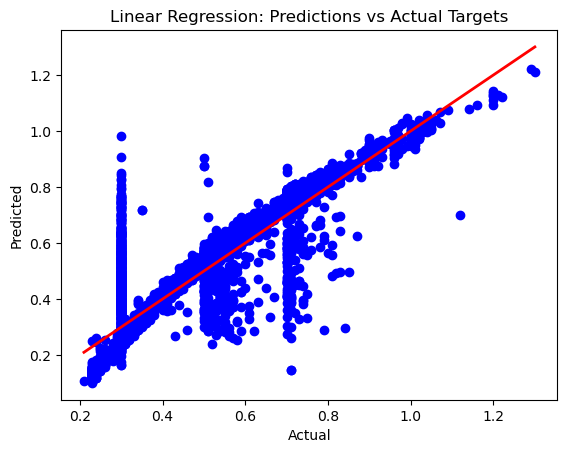

In [48]:
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Predictions vs Actual Targets')
plt.show()


In [50]:
class Ridgeregression:
    def __init__(self, lambda_param=0.1):
        self.lambda_param = lambda_param
        self.weights = None
    
    def fit(self, X_train, y_train):
        X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        identity_matrix = np.eye(X_train_b.shape[1])
        identity_matrix[0, 0] = 0 
        
        self.weights = np.linalg.inv(X_train_b.T.dot(X_train_b) + self.lambda_param * identity_matrix).dot(X_train_b.T).dot(y_train)

        residual_sum_of_squares = np.sum((y_train - X_train_b.dot(self.weights)) ** 2)
        regularization_term = self.lambda_param * np.sum(self.weights[1:] ** 2)
        cost = 0.5 * (residual_sum_of_squares + regularization_term)

        print(f'J(w): {cost}')
        
    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X] 
        return X_b.dot(self.weights)

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def plot_predictions(self, y_test, y_test_pred):
        plt.scatter(y_test, y_test_pred, color='blue')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title('Ridge Regression: Predictions vs Actual Targets')
        plt.show()

J(w): 547.122538754099
Ridge Regression MSE on training set: 0.02535717815694855
Ridge Regression MSE on test set: 0.00531058257753823


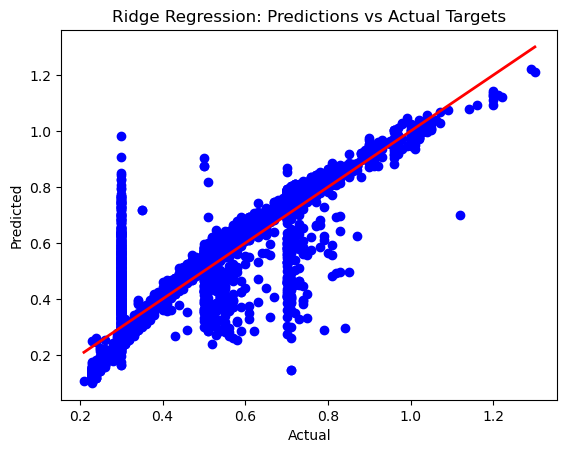

In [52]:
ridge_reg = Ridgeregression(lambda_param=0.1)

ridge_reg.fit(X_train, y_train)

y_train_pred_ridge = ridge_reg.predict(X_train)
y_test_pred_ridge = ridge_reg.predict(X_test)

mse_train_ridge = ridge_reg.mse(y_train, y_train_pred_ridge)
mse_test_ridge = ridge_reg.mse(y_test, y_test_pred_ridge)


print(f'Ridge Regression MSE on training set: {mse_train_ridge}')
print(f'Ridge Regression MSE on test set: {mse_test_ridge}')

ridge_reg.plot_predictions(y_test, y_test_pred_ridge)

In [63]:
import pickle

with open('Linearregression.pkl', 'wb') as file:
    pickle.dump({
        'weights': weights 
    }, file)

print("Linear Regression saved to LinearregressionModel.pkl")

with open('RidgeregressionModel.pkl', 'wb') as file:
    pickle.dump({
        'weights': ridge_reg.weights, 
        'lambda_param': ridge_reg.lambda_param 
    }, file)

print("Ridge Regression saved to RidgeregressionModel.pkl")


Linear Regression saved to LinearregressionModel.pkl
Ridge Regression saved to RidgeregressionModel.pkl
